# Задача 1 
Посчитать численно $DV01$ как разностную производную.
1. Номер выпуска облигации определяет функция getBond ниже
1. Процентные ставки известны ниже curve_tenors, curve_rates
1. Использоватье линейную интерполяцию кубическими сплайнами (см. пример ниже)


Данные о выпуске облигаций доступны по ссылке 
https://www.efd.admin.ch/efd/en/home/the-fdf/nsb-news_list.msg-id-85031.html

$$ PV  = PV (r_1, r_2, r_3, ..., r_N) = \sum \limits_{i=1}^{N} \frac{C_i}{(1 + r_i)^{t_i}} $$
где $r_i$ - значение ставки, $C_i$ - выплата в день купонного платежа под номером $i$

$$ DV01 (r_1, r_2,  ..., r_N) = \lim \limits_{\delta \to 0} \frac{PV (r_1 + \delta r, r_2 + \delta r, ..., r_N + \delta r) - PV (r_1, r_2,  ..., r_N)}{\delta}  \approx
\frac{PV (r_1 + \Delta r, r_2 + \Delta r, ..., r_N + \Delta r) - PV (r_1 - \Delta r, r_2 - \Delta r, ..., r_N - \Delta r)}{2 \Delta r}$$

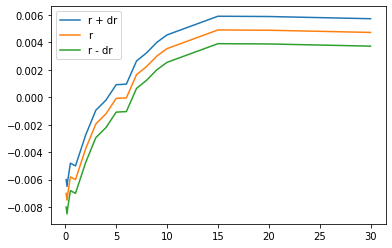

In [1]:
import numpy as np
import scipy.interpolate
from matplotlib.pyplot import plot, legend

curve_tenors = np.array([1/12, 1/6, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 30.0])
curve_rates = np.array([-0.700, -0.750, -0.700, -0.580, -0.600, -0.375, -0.194, -0.120, -0.008, -0.004, 0.165, 0.225, 0.301, 0.355, 0.491, 0.489, 0.473])*1e-2

plot(curve_tenors, curve_rates + 1e-3, label = 'r + dr')
plot(curve_tenors, curve_rates, label = 'r')
plot(curve_tenors, curve_rates - 1e-3, label = 'r - dr')
legend()

In [2]:
f = scipy.interpolate.interp1d(curve_tenors, curve_rates, kind = 'cubic')

In [3]:
def getBond(email):
    import hashlib
    h = int(hashlib.sha1(email.encode('utf-8')).hexdigest(), 16)
    bonds = ['CH0184249990', 'CH0344958688', 'CH0344958498']
    return bonds[h % len(bonds)]
getBond('yadunaew@gmail.com')

'CH0344958498'

Interest rate: 0.50% 
Maturity: 28.06.2045
Amount: CHF 222.550 million (0 million own tranche)
Issue price: 111.90%
Yield p.a.: -0.001%
Total bids: CHF 258.550 million
Allotment in last price category: 100%
Offers without price details: CHF 106.850 million
Settlement: 22.09.2021
ISIN no. (until settlement): CH0557778385
Fungible with ISIN no.: CH0344958498

In [4]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as pt
import pandas as pd

pd.to_datetime('06.28.2022')-pd.to_datetime('09.22.2021')


Timedelta('279 days 00:00:00')

In [5]:
days_old = np.array([279, 360, 360, 360, 360, 360, 360, 360, 360, 360 ]) 
payments_old = np.array([5/360*279, 5, 5, 5, 5, 5, 5, 5, 5, 1005])

Price = 1.119*1000

def pv_ytm(days, payments, ytm):
    days = np.cumsum(days) / 360
    df = np.power(1.0 / (ytm + 1.0), days)
    return np.sum(payments*df)

ytm = scipy.optimize.broyden1( lambda x: (pv_ytm(days_old, payments_old, x) - Price), 0.005)
ytm, pv_ytm(days_old, payments_old, ytm)

(array(-0.00673673), 1119.0000005840202)

In [6]:
def duration(days, payments, ytm, price):
    days = np.cumsum(days) / 360
    df = np.power(1.0 / (f(days) + 1.0), days)
    return np.sum(payments*df*days) / price
duration(days_old, payments_old, ytm, Price)

8.678032412299222

In [7]:
def mod_duration(days, payments, ytm, price):
    days = np.cumsum(days) / 360
    df = np.power(1.0 / (f(days) + 1.0), days)
    return np.sum(payments*df*days) / price / (1 + ytm/2)
mod_duration(days_old, payments_old, ytm, Price)

8.707361990128641

In [8]:
dv01 = mod_duration(days_old, payments_old, ytm, Price)*Price*1e-4
dv01

0.9743538066953951

In [9]:
dv01_num = 0.5*(pv_ytm(days_old, payments_old, ytm-1e-4) - pv_ytm(days_old, payments_old, ytm+1e-4))
dv01_num

1.0790778466531492

Ответ: 1.0790778466531492

# Задача 2

1. Взяв облигацию из предыдущей задачи, захэджировать ее  CH0557778310

https://www.efd.admin.ch/efd/en/home/the-fdf/nsb-news_list.msg-id-87527.html


Использовать для расчета $DV01$ кривую выше

Чему равна $beta$?



2. Построить график $PV$ портфеля от величины вертикального сдвига кривой $\Delta$
$$ PV (r; \Delta) = PV (r_1 + \Delta, r_2+ \Delta, r_3+ \Delta, ..., r_N+ \Delta) = \sum \limits_{i=1}^{N} \frac{C_i}{(1 + r_i + \Delta)^{t_i}} $$





interest rate: 0.25%
Maturity: 23.06.2035
Amount: CHF 174.000 million (0 million own tranche)
Issue price: 98.90%
Yield p.a.: 0.335%
Total bids: CHF 324.000 million
Allotment in last price category: 100%
Offers without price details: CHF 66.600 million
Settlement: 23.03.2022 
ISIN no. (until settlement): CH0557778500
Fungible with ISIN no.: CH0557778310

In [10]:
pd.to_datetime('06.23.2022')-pd.to_datetime('03.26.2022')

Timedelta('89 days 00:00:00')

In [11]:
days = np.array([89, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
                 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91])
payments = np.array([6.11, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25
                   , 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25
                   , 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 1006.25])

In [12]:
dv01_hedge = 0.5*(pv_ytm(days, payments, ytm-1e-4) - pv_ytm(days, payments, ytm+1e-4))
beta = - dv01_num / dv01_hedge
beta

-0.6281915225514713

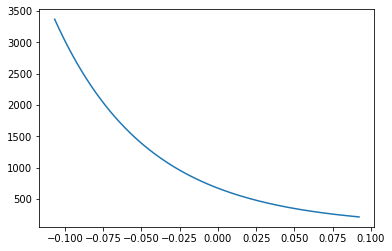

In [15]:
r = np.arange(ytm-0.1, ytm+0.1, 1e-3)
pv = []
pv_trade = [] 
for y in r:
    pv+=[pv_ytm(days, payments, y) + beta * pv_ytm(days_old, payments_old, y)]
    pv_trade += [pv_ytm(days, payments, y)]
pt.plot(r, pv)

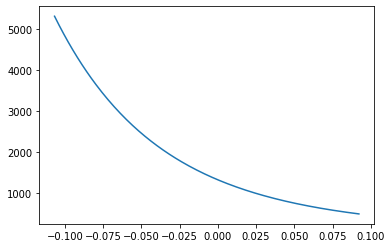

In [16]:
pt.plot(r, pv_trade)